Adam Damreh
801234742
HW 1
6/10/24

In [ ]:
PROBLEM 1

x1 type: float64, x2 type: float64, x3 type: float64, y type: float64
Iteration 0: theta0 = 6.155692017723641e-19, theta1 = -0.008611200745977604, cost = 0.4926217985603911
Iteration 100: theta0 = 3.5175382958420826e-17, theta1 = -0.5490742555455879, cost = 0.17792240515634444
Iteration 200: theta0 = 5.551115123125786e-17, theta1 = -0.746901212865571, cost = 0.13575908275007237
Iteration 300: theta0 = 5.535725893081477e-17, theta1 = -0.8193122772203639, cost = 0.13011005452314864
Iteration 400: theta0 = 5.568702814604997e-17, theta1 = -0.8458170686402348, cost = 0.1293531995580419
Iteration 500: theta0 = 5.564305891735194e-17, theta1 = -0.8555186794986089, cost = 0.1292517963759023
Iteration 600: theta0 = 5.564305891735194e-17, theta1 = -0.8590697828352217, cost = 0.12923821041052966
Iteration 700: theta0 = 5.579695121779503e-17, theta1 = -0.8603696015036253, cost = 0.12923639016730643
Iteration 800: theta0 = 5.559908968865392e-17, theta1 = -0.8608453771740513, cost = 0.129236146291711

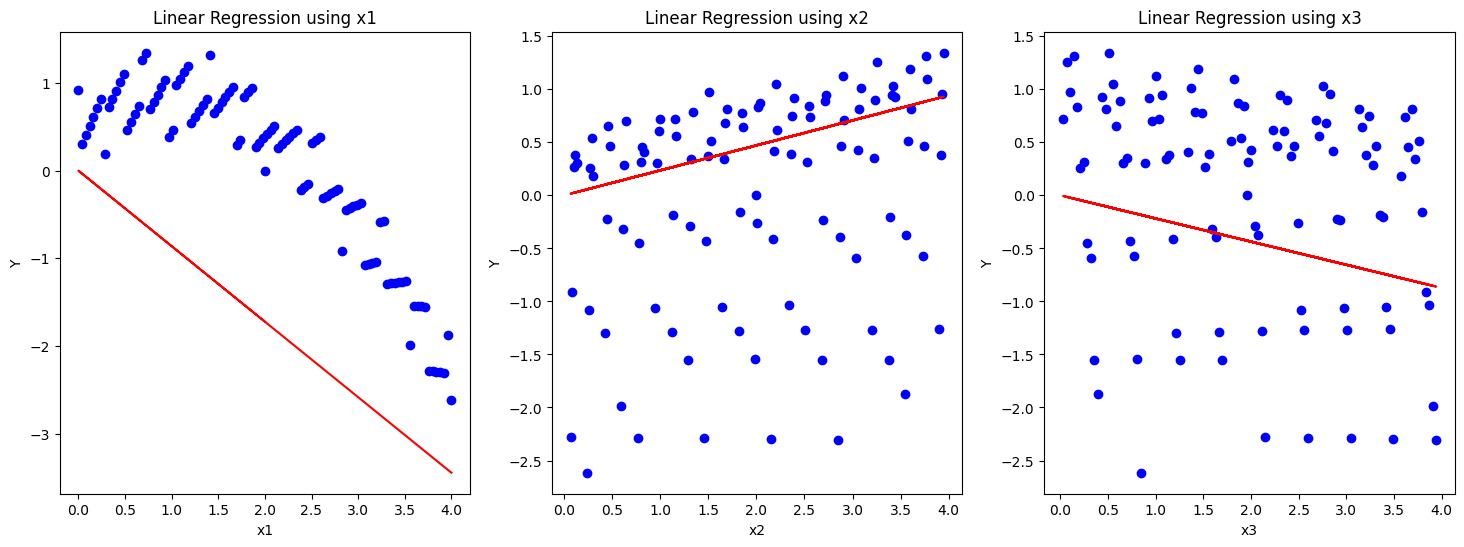

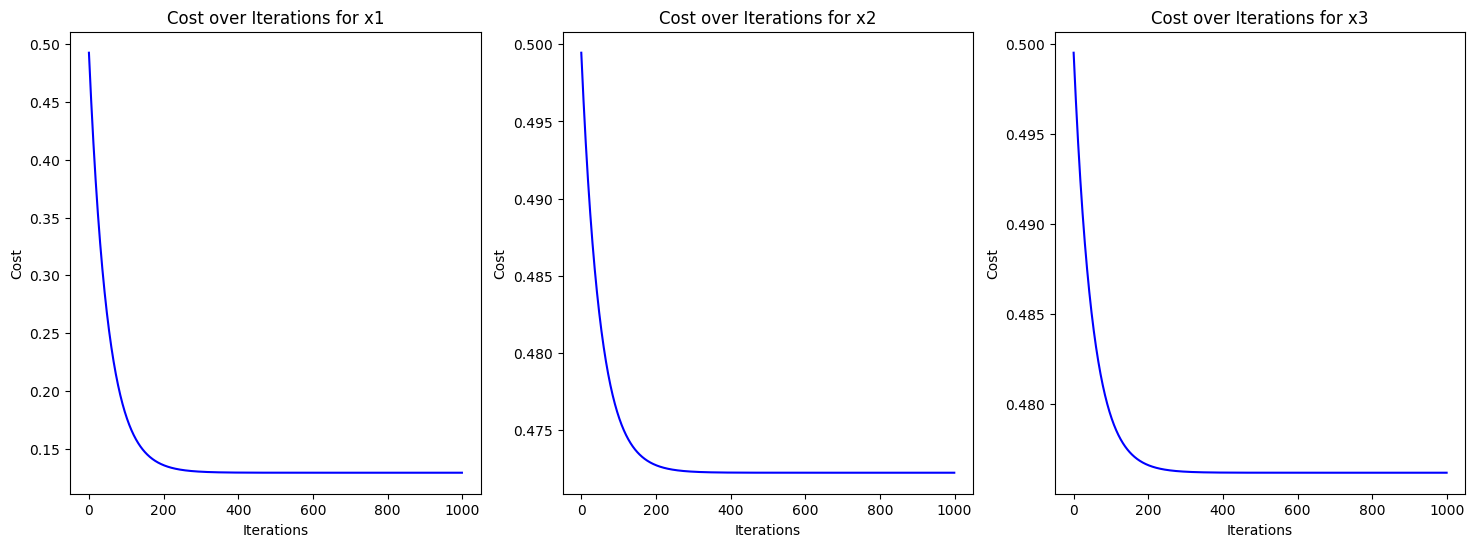

Linear model for x1: Y = 5.5379243545163786e-17 + -0.8610828989699693 * x1
Final cost for x1: 0.12923610925338758

Linear model for x2: Y = 1.3845910117008398e-16 + 0.23555234209563097 * x2
Final cost for x2: 0.4722551516106178

Linear model for x3: Y = 1.3498553210293988e-17 + -0.21815349904311737 * x3
Final cost for x3: 0.47620247077828026

Variable with lowest cost: x1
Iteration 0: theta0 = 6.15569201772364e-18, theta1 = -0.08611200745977603, cost = 0.42955486062685105
Iteration 100: theta0 = 5.650045887696343e-17, theta1 = -0.8610994892993479, cost = 0.12923610877425118
Iteration 200: theta0 = 5.4741689729042384e-17, theta1 = -0.8611200740509859, cost = 0.1292361085623739
Iteration 300: theta0 = 5.84790741683746e-17, theta1 = -0.8611200745977458, cost = 0.1292361085623739
Iteration 400: theta0 = 5.5401228159512774e-17, theta1 = -0.8611200745977597, cost = 0.1292361085623739
Iteration 500: theta0 = 5.5401228159512774e-17, theta1 = -0.8611200745977597, cost = 0.1292361085623739
Itera

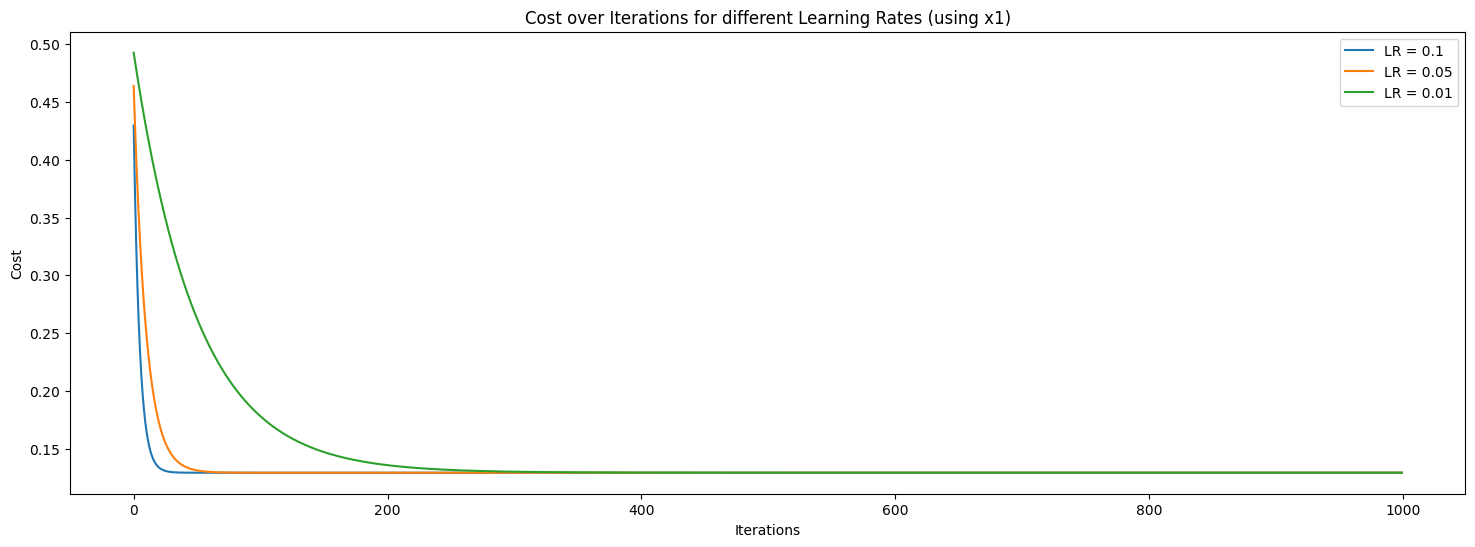

Impact of learning rates on final loss and iterations:
Learning rate 0.1: Final cost = 0.1292361085623739, Iterations = 1000
Learning rate 0.05: Final cost = 0.1292361085623739, Iterations = 1000
Learning rate 0.01: Final cost = 0.12923610925338758, Iterations = 1000


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('HW1.csv', header=None)

# I was getting lots of nans on my outputs for some reason so I googled the issue, I dont quite understand it but this code is supposed to help with the scale
data = data.apply(pd.to_numeric, errors='coerce')
data = data.fillna(data.mean()) 

x1 = data.iloc[:, 0].values
x2 = data.iloc[:, 1].values
x3 = data.iloc[:, 2].values
y = data.iloc[:, 3].values

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x1 = scaler.fit_transform(x1.reshape(-1, 1)).flatten()
x2 = scaler.fit_transform(x2.reshape(-1, 1)).flatten()
x3 = scaler.fit_transform(x3.reshape(-1, 1)).flatten()
y = scaler.fit_transform(y.reshape(-1, 1)).flatten()

#This code is also for the nan errors I was getting
print(f"x1 type: {x1.dtype}, x2 type: {x2.dtype}, x3 type: {x3.dtype}, y type: {y.dtype}")

def hypothesis(theta, x):
    return theta[0] + theta[1] * x

def cost_function(theta, x, y):
    m = len(y)
    return (1/(2*m)) * np.sum((hypothesis(theta, x) - y) ** 2)

def gradient_descent(x, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []
    
    for i in range(iterations):
        temp0 = theta[0] - (learning_rate/m) * np.sum(hypothesis(theta, x) - y)
        temp1 = theta[1] - (learning_rate/m) * np.sum((hypothesis(theta, x) - y) * x)
        theta[0] = temp0
        theta[1] = temp1
        
        cost = cost_function(theta, x, y)
        if np.isnan(cost):
            print(f"NaN at iteration {i}: theta0 = {theta[0]}, theta1 = {theta[1]}")
            break
        cost_history.append(cost)
        
        if i % 100 == 0:
            print(f"Iteration {i}: theta0 = {theta[0]}, theta1 = {theta[1]}, cost = {cost_history[-1]}")
    
    return theta, cost_history

learning_rate = 0.01
iterations = 1000
theta_init = [0, 0]

variables = [x1, x2, x3]
theta_list = []
cost_history_list = []

for var in variables:
    theta, cost_history = gradient_descent(var, y, theta_init.copy(), learning_rate, iterations)
    theta_list.append(theta)
    cost_history_list.append(cost_history)

plt.figure(figsize=(18, 6))

for i, var in enumerate(['x1', 'x2', 'x3']):
    plt.subplot(1, 3, i+1)
    plt.scatter(data[i], y, color='blue')
    plt.plot(data[i], hypothesis(theta_list[i], data[i]), color='red')
    plt.xlabel(var)
    plt.ylabel('Y')
    plt.title(f'Linear Regression using {var}')

plt.show()

plt.figure(figsize=(18, 6))

for i, cost_history in enumerate(cost_history_list):
    plt.subplot(1, 3, i+1)
    plt.plot(range(iterations), cost_history, color='blue')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title(f'Cost over Iterations for {["x1", "x2", "x3"][i]}')

plt.show()

final_costs = [cost[-1] for cost in cost_history_list if cost]
best_variable_index = np.argmin(final_costs)
best_variable = ['x1', 'x2', 'x3'][best_variable_index]

for i, var in enumerate(['x1', 'x2', 'x3']):
    if cost_history_list[i]:
        print(f'Linear model for {var}: Y = {theta_list[i][0]} + {theta_list[i][1]} * {var}')
        print(f'Final cost for {var}: {final_costs[i]}\n')

print(f'Variable with lowest cost: {best_variable}')

learning_rates = [0.1, 0.05, 0.01]
theta_learning_rates = []
cost_learning_rates = []

for lr in learning_rates:
    theta_lr, cost_lr = gradient_descent(x1, y, theta_init.copy(), lr, iterations)
    theta_learning_rates.append(theta_lr)
    cost_learning_rates.append(cost_lr)

plt.figure(figsize=(18, 6))

for i, lr in enumerate(learning_rates):
    plt.plot(range(iterations), cost_learning_rates[i], label=f'LR = {lr}')

plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Vs. Iterations for different LRs (using x1)')
plt.legend()
plt.show()

print("Impact of learning rates on final loss and iterations:")
for i, lr in enumerate(learning_rates):
    print(f"Learning rate {lr}: Final cost = {cost_learning_rates[i][-1]}, Iterations = {iterations}")


In [ ]:
PROBLEM 2

Iteration 0: cost = 0.491598634409652
Iteration 100: cost = 0.14628925758152742
Iteration 200: cost = 0.10344907034973085
Iteration 300: cost = 0.0978145757653539
Iteration 400: cost = 0.09702769344046551
Iteration 500: cost = 0.09691160582012126
Iteration 600: cost = 0.09689369021052545
Iteration 700: cost = 0.09689083010074034
Iteration 800: cost = 0.09689036251859927
Iteration 900: cost = 0.09689028485105289


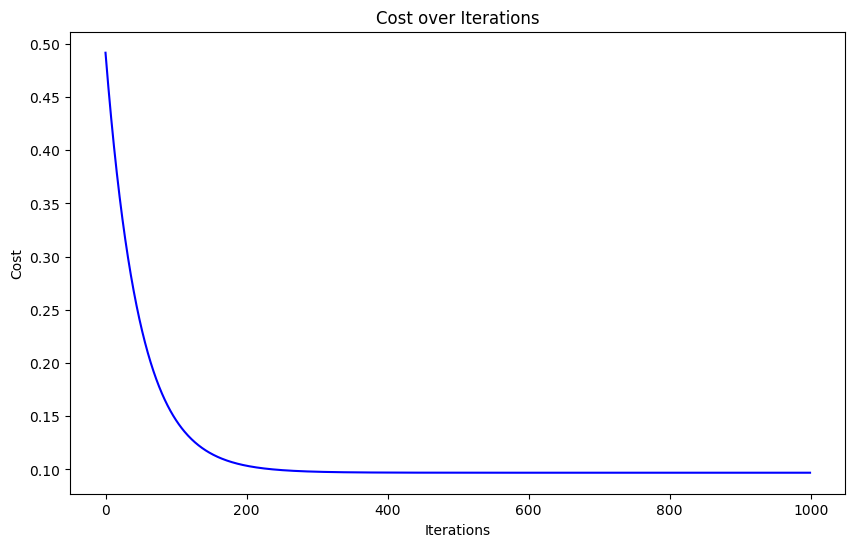

Final linear model: Y = 1.1084642554772362e-16 + -0.8464364463086571 * X1 + 0.22496843645619857 * X2 + -0.11137753535153426 * X3
Final cost: 0.0968902718640704
Iteration 0: cost = 0.42001472542581614
Iteration 100: cost = 0.09689027022350272
Iteration 200: cost = 0.09689026916472579
Iteration 300: cost = 0.09689026916472576
Iteration 400: cost = 0.09689026916472579
Iteration 500: cost = 0.09689026916472582
Iteration 600: cost = 0.09689026916472582
Iteration 700: cost = 0.09689026916472582
Iteration 800: cost = 0.09689026916472579
Iteration 900: cost = 0.09689026916472579
Iteration 0: cost = 0.4588883678992145
Iteration 100: cost = 0.09690686406103632
Iteration 200: cost = 0.09689027094853662
Iteration 300: cost = 0.09689026916494373
Iteration 400: cost = 0.09689026916472583
Iteration 500: cost = 0.0968902691647258
Iteration 600: cost = 0.09689026916472579
Iteration 700: cost = 0.09689026916472579
Iteration 800: cost = 0.09689026916472582
Iteration 900: cost = 0.09689026916472582
Iterat

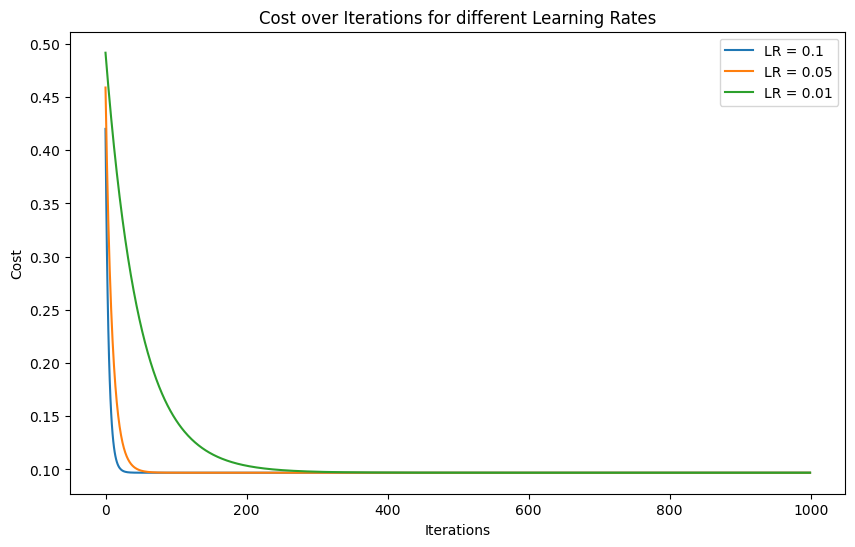

Impact of different learning rates on the final loss and number of training iterations:
Learning rate 0.1: Final cost = 0.09689026916472582, Iterations taken = 1000
Learning rate 0.05: Final cost = 0.09689026916472582, Iterations taken = 1000
Learning rate 0.01: Final cost = 0.0968902718640704, Iterations taken = 1000
Prediction for [1 1 1]: 3.5774155289200067
Prediction for [2 0 4]: 0.24414818194395593
Prediction for [3 2 1]: 0.10278682259184402


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('HW1.csv', header=None)

data = data.apply(pd.to_numeric, errors='coerce')
data = data.fillna(data.mean())  # Filling NaNs with column mean

X = data.iloc[:, 0:3].values
y = data.iloc[:, 3].values

from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

def hypothesis(theta, X):
    return np.dot(X, theta)

def cost_function(theta, X, y):
    m = len(y)
    return (1/(2*m)) * np.sum((hypothesis(theta, X) - y) ** 2)

def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []
    
    for i in range(iterations):
        theta = theta - (learning_rate/m) * np.dot(X.T, (hypothesis(theta, X) - y))
        cost = cost_function(theta, X, y)
        if np.isnan(cost):
            print(f"NaN at iteration {i}: theta = {theta}")
            break
        cost_history.append(cost)
        
        if i % 100 == 0:
            print(f"Iteration {i}: cost = {cost_history[-1]}")
    
    return theta, cost_history

learning_rate = 0.01
iterations = 1000
theta_init = np.zeros(X.shape[1] + 1)

X_b = np.c_[np.ones((X.shape[0], 1)), X]

theta, cost_history = gradient_descent(X_b, y, theta_init, learning_rate, iterations)

plt.figure(figsize=(10, 6))
plt.plot(range(iterations), cost_history, color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost over Iterations')
plt.show()

print(f'Final linear model: Y = {theta[0]} + {theta[1]} * X1 + {theta[2]} * X2 + {theta[3]} * X3')
print(f'Final cost: {cost_history[-1]}')

learning_rates = [0.1, 0.05, 0.01]
theta_learning_rates = []
cost_learning_rates = []

for lr in learning_rates:
    theta_lr, cost_lr = gradient_descent(X_b, y, theta_init.copy(), lr, iterations)
    theta_learning_rates.append(theta_lr)
    cost_learning_rates.append(cost_lr)

plt.figure(figsize=(10, 6))

for i, lr in enumerate(learning_rates):
    plt.plot(range(iterations), cost_learning_rates[i], label=f'LR = {lr}')

plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost over Iterations for different Learning Rates')
plt.legend()
plt.show()

print("Impact of different learning rates on the final loss and number of training iterations:")
for i, lr in enumerate(learning_rates):
    print(f"Learning rate {lr}: Final cost = {cost_learning_rates[i][-1]}, Iterations taken = {iterations}")

new_values = np.array([[1, 1, 1], [2, 0, 4], [3, 2, 1]])
new_values_normalized = scaler_X.transform(new_values)
new_values_b = np.c_[np.ones((new_values_normalized.shape[0], 1)), new_values_normalized]
predictions_normalized = hypothesis(theta, new_values_b)
predictions = scaler_y.inverse_transform(predictions_normalized.reshape(-1, 1))

for i, new_val in enumerate(new_values):
    print(f"Prediction for {new_val}: {predictions[i][0]}")
